### 1. Data Understanding

In [1]:
#@markdown import library
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris_data = pd.DataFrame(data=iris.data,columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris_data['Species'] = iris.target
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 2. Data Preprocessing

In [7]:
iris_data.isnull() # we want to know is there nah
iris_data.isnull().sum() # more convinent

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
Species,0


In [8]:
print(iris_data['Species'].value_counts())

Species
0    50
1    50
2    50
Name: count, dtype: int64


To understand the balance or imbalance in the dataset

### 3. Exploratory Data Analysis

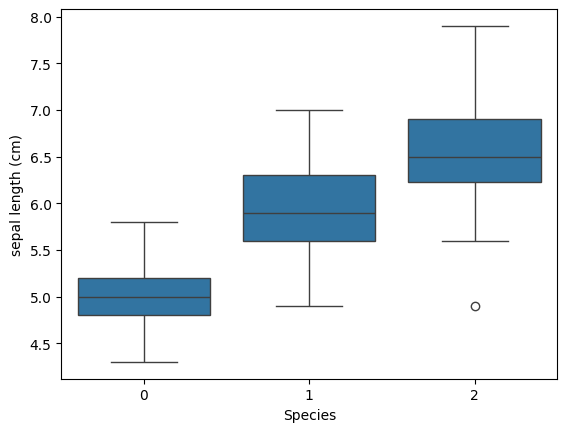

In [9]:
#@markdown In order to know there are outliers or not
sns.boxplot(x='Species', y='sepal length (cm)', data=iris_data)
plt.show()

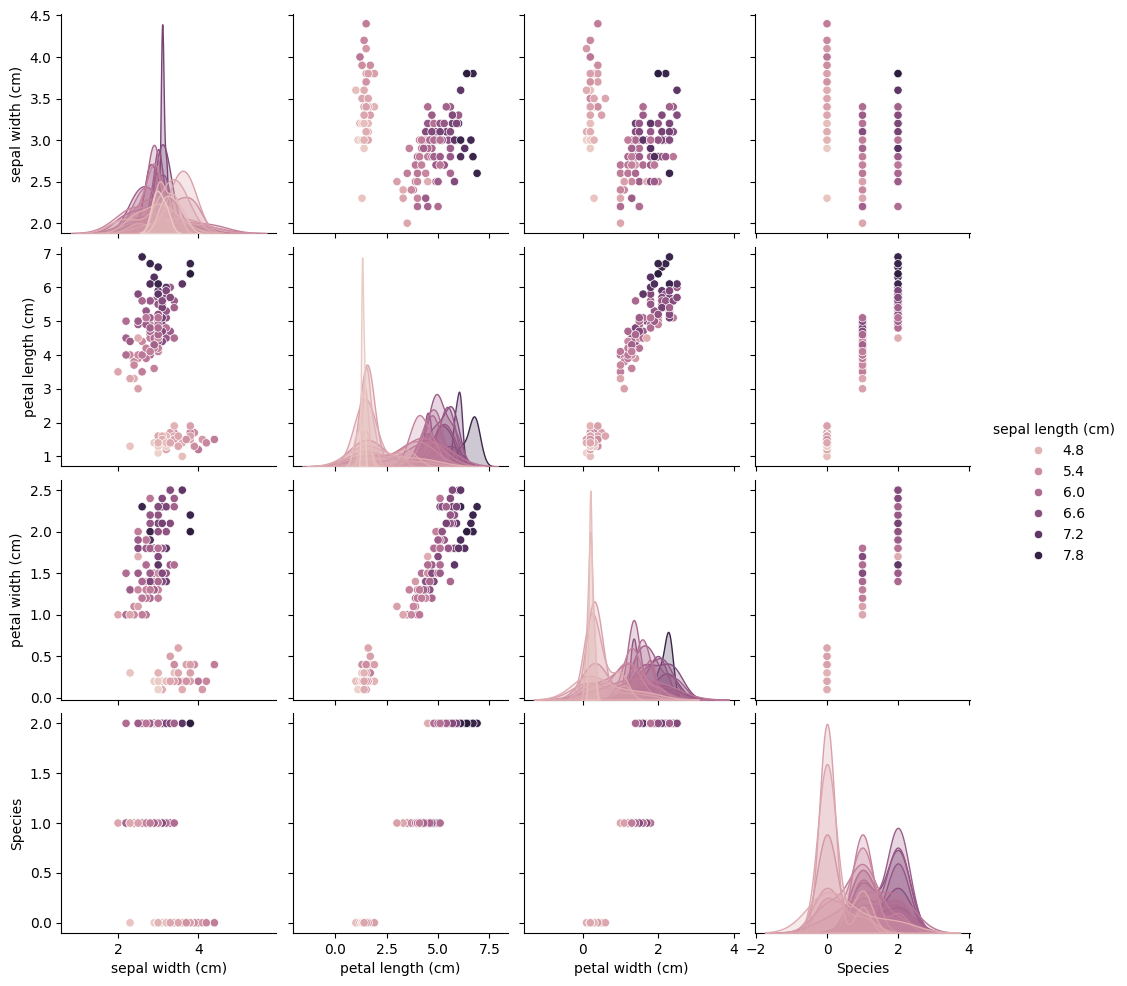

In [10]:
#@markdown we can easily see that the value of 0 (setosa) sepal length is lower than others
sns.pairplot(iris_data, hue='sepal length (cm)')
plt.show()

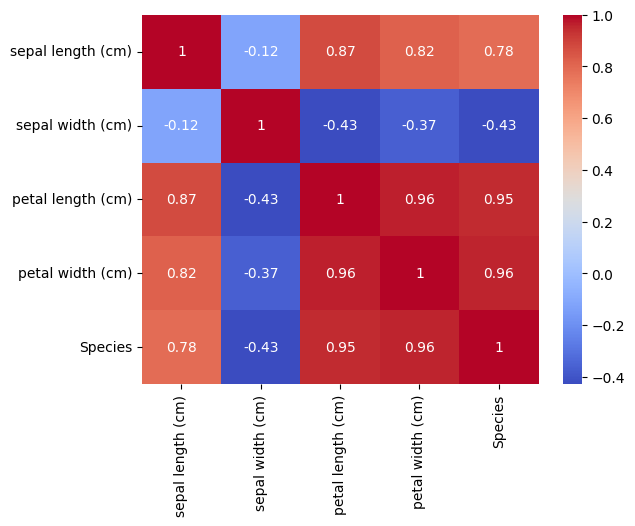

In [11]:
correlation_matrix = iris_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 4. Modelling

In [12]:
X = iris_data.iloc[: , :-1]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
Y = iris_data.iloc[:,-1]
Y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [15]:
Y_train

,Species
22,0
15,0
65,1
11,0
42,0
...,...
71,1
106,2
14,0
92,1


In [16]:
X_test.shape

(30, 4)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
y_predtra = classifier.predict(X_train)
y_predtra

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

### 5. Evaluation

In [20]:
print('Training Score:', classifier.score(X_train,Y_train))
print('Testing Score:', classifier.score(X_test,Y_test))

Training Score: 0.975
Testing Score: 1.0


Thus, we might conclude that the training score was marginally lower than the testing score. We can determine that the model is underfitting if the testing score is higher than the training score. It can be determined that the model is overfitting if the training score is higher than the testing score.


In [21]:
Accuracy_Score = accuracy_score(Y_test,y_pred)
Precision_Score = precision_score(Y_test,y_pred,average='macro') # we have to write average = "macro" in order to classify more than 2 classes (it finds the main values of each classes)
Recall_Score = recall_score(Y_test,y_pred,average='macro')
f1_score = f1_score(Y_test,y_pred,average='macro')
print('Accuracy Score: ', Accuracy_Score)
print('Precision Score: ', Precision_Score)
print('Recall Score: ', Recall_Score)
print('F1 Score: ', f1_score)

Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


In [22]:
confusion_matrix(Y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

### 6. Test Case

In [23]:
iris_data.head(1) # model data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0


In [24]:
test_data = pd.DataFrame({'sepal length (cm)':[5.8], 'sepal width (cm)':[3], 'petal length (cm)':[1.7],'petal width (cm)':[0.4]})
test_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.8,3,1.7,0.4


I created the new testing dataset include sepal length, sepal width, petal length, and petal width. In that dataset I didn't create species because we want to know the result of species based on our test data.

In [25]:
test_y_pred = classifier.predict(test_data)
test_y_pred

array([0])

We got 0. That means our new dataset for species is setosa.

### Model Save & Load

In [26]:
import pickle
with open('/content/model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [27]:
with open('/content/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [28]:
test_y_pred = loaded_model.predict(X_train)
test_y_pred

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [29]:
Y_train

,Species
22,0
15,0
65,1
11,0
42,0
...,...
71,1
106,2
14,0
92,1


### Deployment by using Gradio

In [30]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
X_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [31]:
import gradio as gr
import pickle

def model(sl,sw,pl,pw):
  sepal_length = float()
  sepal_width = float()
  petal_length = float()
  petal_width = float()
  dataframe = pd.DataFrame({"sepal length (cm)":[sepal_length],"sepal width (cm)":[sepal_width],'petal length (cm)':[petal_length],'petal width (cm)':[petal_width]})
  with open('/content/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    output = loaded_model.predict(dataframe)
    if output == 0:
        return"The output class is setosa"
    elif output == 1:
        return"The output class is versicolor"
    elif output == 2:
        return"The output class is virginica"

with gr.Blocks() as demo:
  with gr.Row():
    sepal_length = gr.Number(label="Sepal length (cm)", value=5.1)
    sepal_width = gr.Number(label="Sepal width (cm)", value=3.5)
    petal_length = gr.Number(label="Petal length (cm)", value=1.1)
    petal_width = gr.Number(label="Petal width (cm)", value=2.1)
  with gr.Row():
    outputs = gr.Textbox(label='Prediction')
    run = gr.Button(value="Prediction")
    run.click(model, inputs=[sepal_length, sepal_width, petal_length, petal_width], outputs=outputs)
demo.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cd77fc05ea6dfef352.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://cd77fc05ea6dfef352.gradio.live
